<a href="https://colab.research.google.com/github/TypeMIN/ML_study/blob/master/08_3_Visualization_of_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 합성곱 신경망의 시각화

## 가중치 시각화

In [3]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 73s 49ms/step - loss: 0.4990 - accuracy: 0.8250 - val_loss: 0.3208 - val_accuracy: 0.8812
Epoch 2/20
1500/1500 [==============================] - 84s 56ms/step - loss: 0.3325 - accuracy: 0.8813 - val_loss: 0.2793 - val_accuracy: 0.8944
Epoch 3/20
1500/1500 [==============================] - 85s 57ms/step - loss: 0.2838 - accuracy: 0.8978 - val_loss: 0.2503 - val_accuracy: 0.9055
Epoch 4/20
1500/1500 [==============================] - 76s 50ms/step - loss: 0.2550 - accuracy: 0.9071 - val_loss: 0.2390 - val_accuracy: 0.9134
Epoch 5/20
1500/1500 [==============================] - 82s 55ms/step - loss: 0.2310 - accuracy: 0.9144 - val_loss: 0.2292 - val_accuracy: 0.9168
Epoch 6/20
1500/1500 [==============================] - 76s 50ms/step - loss: 0.2121 - accuracy: 0.9217 - val_loss: 0.2285 - val_accuracy: 0.9143
Epoch 7/20
1500/1500 [==============================] - 76s 51ms/step - loss: 0.1967 - accuracy: 0.9262 - val_loss: 0.2193 -

In [4]:
model.layers

In [5]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [6]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.04001036 0.2436733


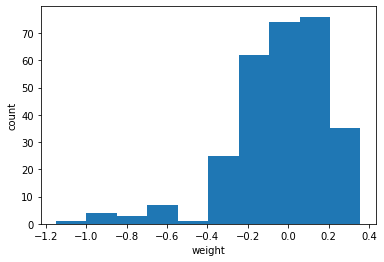

In [7]:
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

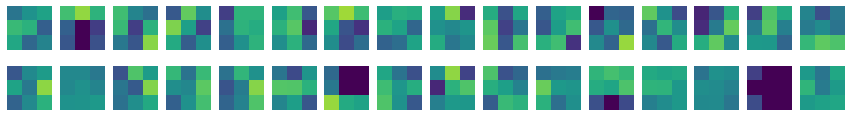

In [8]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(conv_weights[:,:,0,i*16+j], vmin=-0.5, vmax=0.5)
    axs[i, j].axis('off')
plt.show()

In [16]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))

In [17]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [18]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

-0.003322761 0.08333864


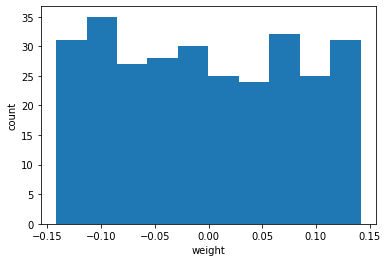

In [19]:
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

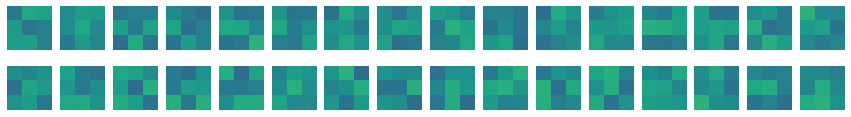

In [20]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(no_training_weights[:,:,0,i*16+j], vmin=-0.5, vmax=0.5)
    axs[i, j].axis('off')
plt.show()

## 함수형 API

In [21]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_2_input'), name='conv2d_2_input', description="created by layer 'conv2d_2_input'")


In [23]:
conv_acti = keras.Model(model.input, model.layers[0].output)

## 특성 맵 시각화

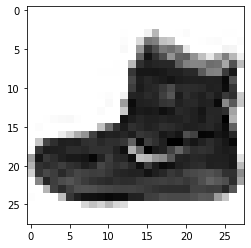

In [24]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [25]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv_acti.predict(inputs)

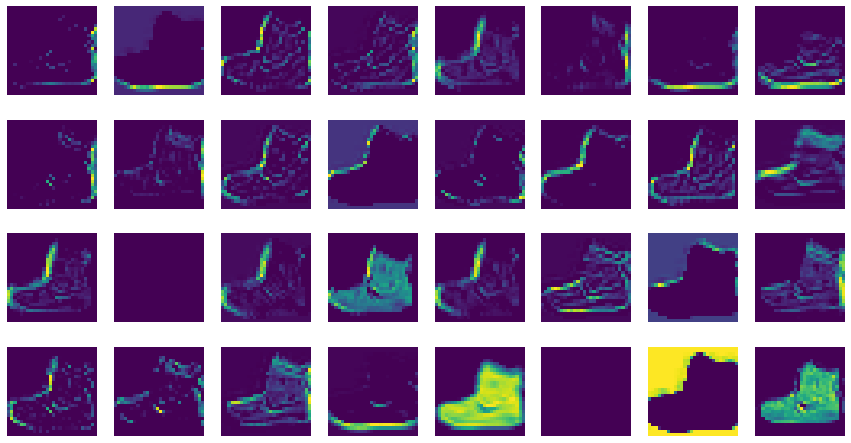

In [27]:
fig, axs = plt.subplots(4, 8, figsize=(15, 8))
for i in range(4):
  for j in range(8):
    axs[i, j].imshow(feature_maps[0,:,:,i*8+j])
    axs[i, j].axis('off')
plt.show()

In [28]:
conv2_acti = keras.Model(model.input, model.layers[2].output)

In [30]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv2_acti.predict(inputs)

In [31]:
print(feature_maps.shape)

(1, 14, 14, 64)


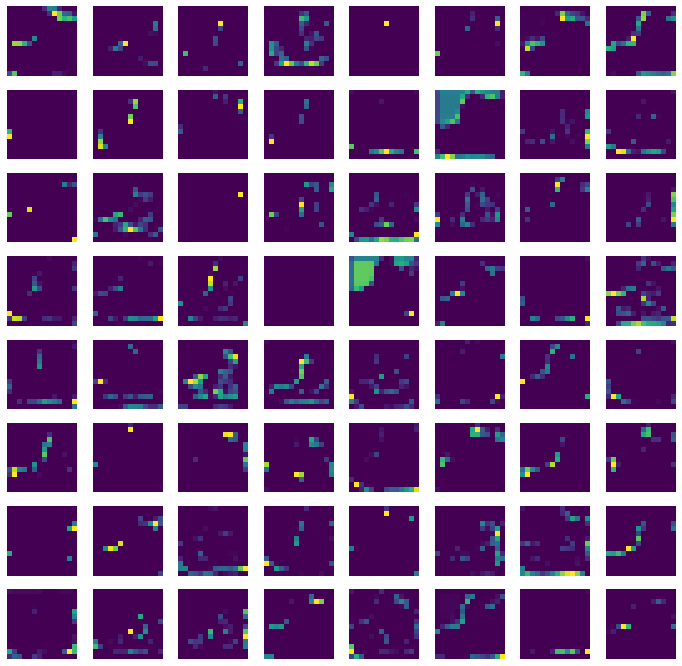

In [33]:
fig, axs = plt.subplots(8, 8, figsize=(12, 12))
for i in range(8):
  for j in range(8):
    axs[i, j].imshow(feature_maps[0,:,:,i*8+j])
    axs[i, j].axis('off')
plt.show()